In [1]:
!unzip -q rice-dataset-sample.zip

replace rice-dataset-sample/Arborio/Arborio (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace rice-dataset-sample/Arborio/Arborio (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [2]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [3]:
!tree rice-dataset-sample -L 1

rice-dataset-sample
├── Arborio
├── Basmati
├── Ipsala
├── Jasmine
└── Karacadag

5 directories, 0 files


In [4]:
!pip install split-folders

In [5]:
import splitfolders

input_dir = '/content/rice-dataset-sample'
output_dir = '/content/rice-dataset-sample-splits'

# TODO: Utiliza la función splitfolders para dividir el conjunto de rice-dataset-sample en
# un conjunto de train, otro de validación y otro de test. Guarda el resultado de los splits
# en el directorio rice-dataset-sample-splits

splitfolders.ratio(
    input_dir,
    output=output_dir,
    seed=42,
    ratio=(.7, .2, .1)
)

Copying files: 50 files [00:00, 3806.22 files/s]


In [6]:
!tree rice-dataset-sample-splits -L 2

rice-dataset-sample-splits
├── test
│   ├── Arborio
│   ├── Basmati
│   ├── Ipsala
│   ├── Jasmine
│   └── Karacadag
├── train
│   ├── Arborio
│   ├── Basmati
│   ├── Ipsala
│   ├── Jasmine
│   └── Karacadag
└── val
    ├── Arborio
    ├── Basmati
    ├── Ipsala
    ├── Jasmine
    └── Karacadag

18 directories, 0 files


## ImageFolders

In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [8]:
from torchvision import datasets

# TODO: Crear un ImageFolder para cada conjunto (train, val y test)
# TIP: Consulta la documentación de ImageFolder de PyTorch

dataset_path = '/content/rice-dataset-sample-splits'

train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{dataset_path}/val", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{dataset_path}/test", transform=transform)

In [9]:
# TODO: Consultando los parámetros de un ImageFolder, imprime la dirección que
# contiene las imágenes de train

print(f"Directorio donde están las imágenes: {train_dataset.root}")

Directorio donde están las imágenes: /content/rice-dataset-sample-splits/train


In [10]:
# TODO: Consultando los parámetros de un ImageFolder, imprime las clases
# contenidas en el ImageFolder de train

print(f"Clases del dataset: {train_dataset.classes}")

Clases del dataset: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [11]:
# TODO: Consultando los parámetros de un ImageFolder, imprime la equivalencia
# entre clases e índices en train.
# TIP: El resultado debe ser algo como: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

print(f"Asignaciones de clase e ID: {train_dataset.class_to_idx}")

Asignaciones de clase e ID: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [12]:
# TODO: Imprime los targets contenidos en el ImageFolder de train

print(f"Targets de las imágenes cargas:{train_dataset.targets}")

Targets de las imágenes cargas:[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4]


## DataLoaders

In [13]:
from torch.utils.data import DataLoader

batch_size = 16
shuffle = True

# TODO: Crear un DataLoader para cada ImageFolder (train, val, test)
# TIP: Consulta la documentación de DataLoader de PyTorch

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

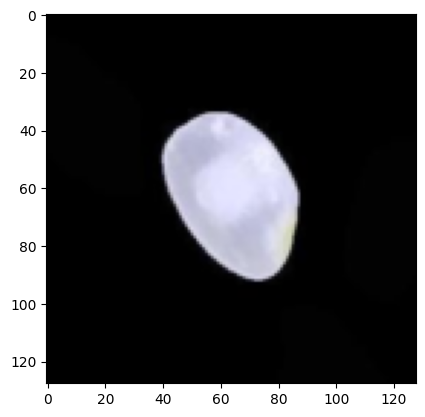

In [15]:
import matplotlib.pyplot as plt

img, label = next(iter(train_dataloader))
plt.imshow(img[0].permute(1,2,0))

## Custom Dataset

In [17]:
import pandas as pd

data = {
    'image_path': [
        '/content/rice-dataset-sample/Arborio/Arborio (1).jpg',
        '/content/rice-dataset-sample/Arborio/Arborio (2).jpg',
        '/content/rice-dataset-sample/Basmati/Basmati (1).jpg',
        '/content/rice-dataset-sample/Basmati/Basmati (2).jpg',
        '/content/rice-dataset-sample/Ipsala/Ipsala (1).jpg',
        '/content/rice-dataset-sample/Ipsala/Ipsala (2).jpg'
    ],
    'target': [
        'Arborio',
        'Arborio',
        'Basmati',
        'Basmati',
        'Ipsala',
        'Ipsala'
    ]
}

dataset = pd.DataFrame(data)
dataset

,image_path,target
0,/content/rice-dataset-sample/Arborio/Arborio (...,Arborio
1,/content/rice-dataset-sample/Arborio/Arborio (...,Arborio
2,/content/rice-dataset-sample/Basmati/Basmati (...,Basmati
3,/content/rice-dataset-sample/Basmati/Basmati (...,Basmati
4,/content/rice-dataset-sample/Ipsala/Ipsala (1)...,Ipsala
5,/content/rice-dataset-sample/Ipsala/Ipsala (2)...,Ipsala


In [20]:
from torchvision.io import read_image
from torch.utils.data import Dataset

class RiceCustomDataset(Dataset):
  def __init__ (self, dataset):
    # TODO: Asigna el valor de dataset a una variable de clase llamada dataset
    self.dataset = dataset

  def __len__(self):
    # TODO: Devuelve la longitud del dataset
    return self.dataset.shape[1]

  def __getitem__(self, index):
    # TODO: Obten la ruta de la imagen de la posición index
    image_path = self.dataset["image_path"][index]
    image = read_image(image_path)
    # TODO: Obtener la etiqueta de la imagen en la posición index
    label = self.dataset["target"][index]

    return image, label

In [21]:
# Instancia el RiceCostumDataset con el dataset anteriormente creado

rice_dataset = RiceCustomDataset(dataset)

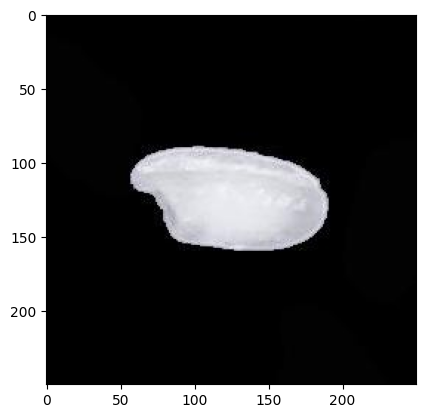

In [22]:
plt.imshow(rice_dataset[0][0].permute(1,2,0))